In [2]:
import pandas as pd
import scipy.sparse as sparse
import numpy as np
import random
import implicit
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import random
import matplotlib.pyplot as plt
from funcsigs import signature
import recmetrics
from sklearn.model_selection import train_test_split
from scipy import spatial
from sklearn.neighbors import NearestNeighbors
from google_trans_new import google_translator  
translator = google_translator()  
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import string
import ml_metrics
import seaborn as sns

In [3]:
## Replace the file location to actual file location of events file from the convert-json_csv.ipynb file
with pd.option_context('display.precision', 19):
    events_df = pd.read_csv('C:/Users/mvkri/OneDrive/Documents/Data Systems Project/events.csv', dtype='str')

In [31]:
#Replace the file with the actual location of the musea.csv file from the taxonomy dataset
col_list = ["mainCategory", "translationSetId", "subCategory", "publicName"]
museum_data = pd.read_csv('C:/Users/mvkri/OneDrive/Documents/Data Systems Project/musea.csv',usecols=col_list)

In [32]:
#Replace the file with the actual location of the evenementen.csv file from the taxonomy dataset
col_list1 = ["eventType", "translationSetId", "name"]
evenementen_data = pd.read_csv('C:/Users/mvkri/OneDrive/Documents/Data Systems Project/evenementen.csv',usecols=col_list1)

In [4]:
## Only for identifying the musuem names for ease of analysis
def extract_page_path(pagepath):
    return pagepath[pagepath.rindex('/')+1:]
events_df['page_path_extract'] = events_df['pagepath'].apply(extract_page_path)

In [5]:
variables_to_remove = ['Unnamed: 0', 'session_ID', 'timestamp',
                        'event_category', 'event_label', 'sessions', 'total_events', 'pagepath']
events_df.drop(variables_to_remove, axis=1, inplace=True)

In [6]:
# remove unwanted event type starting with "slide"
events_df_1 = events_df[~events_df.event_action.str.contains("slide")]

In [7]:
''' remove unwanted event types 

click_event
click_header_link_1
click_search
click_header_link_2
click_logo
open_favorites
click_header_link_3
click_login
click_header_link_4 
undefined
like_highlight
toggle_dark_mode
unlike_highlight
\click_newsletter
click_footer_link_1 
click_social
select_language'''

events_df_2 = events_df_1[~events_df_1.event_action.str.contains("click_event")]
events_df_3 = events_df_2[~events_df_2.event_action.str.contains("click_header_link_1")]
events_df_4 = events_df_3[~events_df_3.event_action.str.contains("click_search")]
events_df_5 = events_df_4[~events_df_4.event_action.str.contains("click_header_link_2")]
events_df_6 = events_df_5[~events_df_5.event_action.str.contains("click_logo")]
events_df_7 = events_df_6[~events_df_6.event_action.str.contains("open_favorites")]
events_df_8 = events_df_7[~events_df_7.event_action.str.contains("click_header_link_3")]
events_df_9 = events_df_8[~events_df_8.event_action.str.contains("click_login")]
events_df_10 = events_df_9[~events_df_9.event_action.str.contains("click_header_link_4")]
events_df_11 = events_df_10[~events_df_10.event_action.str.contains("undefined")]
events_df_12 = events_df_11[~events_df_11.event_action.str.contains("like_highlight")]
events_df_13 = events_df_12[~events_df_12.event_action.str.contains("toggle_dark_mode")]
events_df_14 = events_df_13[~events_df_13.event_action.str.contains("unlike_highlight")]
events_df_15 = events_df_14[~events_df_14.event_action.str.contains("click_newsletter")]
events_df_16 = events_df_15[~events_df_15.event_action.str.contains("click_footer_link_1")]
events_df_17 = events_df_16[~events_df_16.event_action.str.contains("click_social")]
events_df_18 = events_df_17[~events_df_17.event_action.str.contains("select_language")]
events_df_19 = events_df_18[~events_df_18.event_action.str.contains("text-link focus-visible")]
events_df_20 = events_df_19[~events_df_19.event_action.str.contains("text-link cc_pointer")]


In [8]:
# Convert event action to event weight
event_type_strength = {
   'click_read_more': 3.0,
   'text-link': 4.0, 
   'click_more_opening_times': 5.0, 
   'click_plan_route': 7.0,
   'click_card_1': 1.0,  
   'like_museum': 2.0,  
   'click_card_2': 1.0,
   'like_event': 2.0, 
   'click_card_5': 1.0,
   'click_card_4': 1.0,
   'click_card_3': 1.0, 
   'click_card_6': 1.0, 
   'click_card_8': 1.0, 
   'click_card_7': 1.0, 
   'click_card_10': 1.0, 
   'click_card_12': 1.0,
   'click_card_20': 1.0, 
   'click_card_9': 1.0, 
   'click_card_11': 1.0, 
   'click_card_13': 1.0, 
   'click_card_14': 1.0, 
   'click_phone_number': 6.0,
   'unlike_museum': 0.0,
   'click_card_19': 1.0,  
   'click_card_16': 1.0,  
   'click_card_17': 1.0,  
   'unlike_event': 0.0,  
   'click_card_15': 1.0,   
   'click_card_21': 1.0,   
   'click_card_18': 1.0,   
   'click_card_22': 1.0,   
   'click_card_24': 1.0,   
   'click_card_23': 1.0,   
   'click_card_29': 1.0,   
   'like_themepage': 2.0,  
   'click_card_25': 1.0,    
   'click_card_28': 1.0,    
   'click_card_26': 1.0,    
   'click_card_27': 1.0, 
}

events_df_20['event_weight'] = events_df_20['event_action'].apply(lambda x: event_type_strength[x])

C:\Users\mvkri\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# Group the event weight per user and content.
df_events_grouped = events_df_20.groupby(['client_ID', 'content_ID', 'page_path_extract']).sum().reset_index()

In [13]:
#Convert the client Id and content id as category codes for ALS algorithm processing.
df_events_grouped['page_path_extract'] =df_events_grouped['page_path_extract'].astype("category")
df_events_grouped['client_ID'] =df_events_grouped['client_ID'].astype("category")
df_events_grouped['content_ID'] = df_events_grouped['content_ID'].astype("category")
df_events_grouped['clientID'] = df_events_grouped['client_ID'].cat.codes
df_events_grouped['contentID'] = df_events_grouped['content_ID'].cat.codes

In [14]:
#Create two matrices, one for fitting the model (content-person) and one for recommendations (person-content)
sparse_content_person = sparse.csr_matrix((df_events_grouped['event_weight'].astype(float), (df_events_grouped['contentID'], df_events_grouped['clientID'])))
sparse_person_content = sparse.csr_matrix((df_events_grouped['event_weight'].astype(float), (df_events_grouped['clientID'], df_events_grouped['contentID'])))

In [17]:
#Validate the sparsity of the generated person content matrix
matrix_size = sparse_person_content.shape[0]*sparse_person_content.shape[1] # Number of possible interactions in the matrix
num_purchases = len(sparse_person_content.nonzero()[0]) # Number of items interacted with
sparsity = 100*(1 - (num_purchases/matrix_size))
sparsity

99.84966418436407

In [19]:
#Creates a training and test set by masking randomly 20% of the user interactions.
def make_train(ratings, pct_test = 0.2):
    test_set = ratings.copy() # Make a copy of the original set to be the test set. 
    test_set[test_set != 0] = 1 # Store the test set as a binary preference matrix
    
    training_set = ratings.copy() # Make a copy of the original data we can alter as our training set. 
    
    nonzero_inds = training_set.nonzero() # Find the indices in the ratings data where an interaction exists
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1])) # Zip these pairs together of item,user index into list

    
    random.seed(0) # Set the random seed to zero for reproducibility
    
    num_samples = int(np.ceil(pct_test*len(nonzero_pairs))) # Round the number of samples needed to the nearest integer
    samples = random.sample(nonzero_pairs, num_samples) # Sample a random number of item-user pairs without replacement

    content_inds = [index[0] for index in samples] # Get the item row indices

    person_inds = [index[1] for index in samples] # Get the user column indices

    
    training_set[content_inds, person_inds] = 0 # Assign all of the randomly chosen user-item pairs to zero
    training_set.eliminate_zeros() # Get rid of zeros in sparse array storage after update to save space
    
    return training_set, test_set, list(set(person_inds))

In [20]:
content_train, content_test, content_persons_altered = make_train(sparse_content_person, pct_test = 0.2)

In [21]:
#Initialize the Alternating Least Squares (ALS) recommendation model.
model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=100)

In [22]:
alpha = 15
data = (content_train * alpha).astype('double')

# Fit the model
model.fit(data)

In [24]:
person_vecs = sparse.csr_matrix(model.user_factors)
content_vecs = sparse.csr_matrix(model.item_factors)

In [26]:
#Get similar content based on content id
def get_similar_items_content_id(content_id, n_similar):
    return model.similar_items(content_id, n_similar)

In [27]:
def get_recommendations(user_id):
    return model.recommend(user_id, sparse_person_content)

In [28]:
def auc_score(predictions, test):
    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    return metrics.auc(fpr, tpr)

In [29]:
def calc_mean_auc(training_set, altered_persons, predictions, test_set):
    store_auc = [] # An empty list to store the AUC for each user that had an item removed from the training set
    popularity_auc = [] # To store popular AUC scores
    pop_contents = np.array(test_set.sum(axis = 1)).reshape(-1) # Get sum of item iteractions to find most popular
    content_vecs = predictions[1]
    for person in altered_persons: # Iterate through each user that had an item altered
        training_column = training_set[:,person].toarray().reshape(-1) # Get the training set column
        zero_inds = np.where(training_column == 0) # Find where the interaction had not yet occurred
        
        # Get the predicted values based on our user/item vectors
        person_vec = predictions[0][person,:]
        pred = person_vec.dot(content_vecs).toarray()[0,zero_inds].reshape(-1)
        
        # Get only the items that were originally zero
        # Select all ratings from the MF prediction for this user that originally had no iteraction
        actual = test_set[:,person].toarray()[zero_inds,0].reshape(-1)
        
        
        # Select the binarized yes/no interaction pairs from the original full data
        # that align with the same pairs in training 
        pop = pop_contents[zero_inds] # Get the item popularity for our chosen items
        
        store_auc.append(auc_score(pred, actual)) # Calculate AUC for the given user and store
        
        popularity_auc.append(auc_score(pop, actual)) # Calculate AUC using most popular and score
    # End users iteration
    
    return float('%.3f'%np.mean(store_auc)), float('%.3f'%np.mean(popularity_auc))

In [30]:
#Quantiative validation by calculating the mean AUC
calc_mean_auc(content_train, content_persons_altered,
              [person_vecs, content_vecs.T], content_test)

(0.725, 0.836)

In [34]:
evenementen_data.rename(columns={"eventType": "mainCategory"}, inplace=True)

In [35]:
#Merge musuem data from taxonomy to the analytics data
museum_type_df = pd.merge(left=df_events_grouped, right=museum_data,
                       how='left', left_on = 'content_ID', right_on = 'translationSetId')

In [37]:
museum_type_df.replace(np.nan, '', regex=True, inplace=True)

In [38]:
museum_type_df.sort_values(by=['event_weight'],inplace=True)

In [39]:
#Merge evenementen data from taxonomy to the analytics data
museum_event_type_df = pd.merge(museum_type_df, evenementen_data,
                       how='left', left_on = 'content_ID', right_on = 'translationSetId')

In [40]:
museum_event_type_df.replace(np.nan, '', regex=True, inplace=True)

In [41]:
museum_event_type_df['mainCategory'] = museum_event_type_df['mainCategory_x'] + museum_event_type_df['mainCategory_y']

In [42]:
variables_to_remove3 = ['mainCategory_x', 'translationSetId_x', 'mainCategory_y',
                        'translationSetId_y']
museum_event_type_df.drop(variables_to_remove3, axis=1, inplace=True)

In [43]:
museum_type_df_pop = museum_event_type_df.sort_values(['content_ID']).groupby(['content_ID']).first()

museum_type_df_pop = museum_type_df_pop.join(museum_event_type_df['content_ID'].value_counts().to_frame('frequency'))

In [44]:
museum_type_df_pop.sort_values(by=['frequency'], ascending=True, inplace=True)

In [45]:
museum_type_df_pop['content_ID'] = museum_type_df_pop.index

In [47]:
museum_event_type_df = museum_type_df_pop.sort_values(by=['frequency'], ascending=False)

In [62]:
museum_event_type_df['content_ID'] = museum_event_type_df.index

In [50]:
# Appends category and other details to the recommendations
def create_catergory_combinations(recommendations,type_recommendation):
    recommendation_dict = {}
    for i in range(7):
        if i == 0:
            if type_recommendation == 'content':
                pass
            else:
                idx, score = recommendations[i]
                content_id = df_events_grouped.content_ID.loc[df_events_grouped.contentID == idx].iloc[0] #Convert content_Id back to original content ID
                page_path = df_events_grouped.page_path_extract.loc[df_events_grouped.contentID == idx].iloc[0]
                content_found  = content_id in museum_event_type_df.content_ID.values
                if content_found:
                   
                    category_value = museum_event_type_df.loc[museum_event_type_df['content_ID'] == content_id, 'mainCategory']
                    category_value_format = category_value.values.tolist()
                    category_value_string = str(category_value_format[0])
                   
                    category_value_string_fmt = str(category_value_string)
                    sub_category_value = museum_event_type_df.loc[museum_event_type_df['content_ID'] == content_id, 'subCategory']
                    sub_category_value_format = sub_category_value.values.tolist()
                    sub_category_value_fmt = str(sub_category_value_format[0])
                    if sub_category_value_fmt == 'nan':
                        sub_category_value_fmt = " "
                else:
                    category_value_string_fmt = ''
                    sub_category_value_fmt = ' '                 
                recommendation_dict[i] = {}
                recommendation_dict[i] ['content_id'] = content_id
                recommendation_dict[i] ['content_id_trans'] = idx
                recommendation_dict[i] ['category'] = category_value_string_fmt
                recommendation_dict[i] ['sub_category'] = sub_category_value_fmt
                recommendation_dict[i] ['description'] = page_path
        else:
                idx, score = recommendations[i]
                content_id = df_events_grouped.content_ID.loc[df_events_grouped.contentID == idx].iloc[0] #Convert content_Id back to original content ID
                page_path = df_events_grouped.page_path_extract.loc[df_events_grouped.contentID == idx].iloc[0]
                content_found  = content_id in museum_event_type_df.content_ID.values
                if content_found:
                    category_value = museum_event_type_df.loc[museum_event_type_df['content_ID'] == content_id, 'mainCategory']
                    category_value_format = category_value.values.tolist()
                    category_value_string = str(category_value_format[0])
                    category_value_string_fmt = str(category_value_string)
                    sub_category_value = museum_event_type_df.loc[museum_event_type_df['content_ID'] == content_id, 'subCategory']
                    sub_category_value_format = sub_category_value.values.tolist()
                    sub_category_value_fmt = str(sub_category_value_format[0])
                    if sub_category_value_fmt == 'nan':
                        sub_category_value_fmt = " "
                else:
                    category_value_string_fmt = ''
                    sub_category_value_fmt = ' '
                if type_recommendation == 'content':
                    recommendation_dict[i-1] = {}
                    recommendation_dict[i-1] ['content_id'] = content_id
                    recommendation_dict[i-1] ['content_id_trans'] = idx
                    recommendation_dict[i-1] ['category'] = category_value_string_fmt
                    recommendation_dict[i-1] ['sub_category'] = sub_category_value_fmt
                    recommendation_dict[i-1] ['description'] = page_path
                else:
                    recommendation_dict[i] = {}
                    recommendation_dict[i] ['content_id'] = content_id
                    recommendation_dict[i] ['content_id_trans'] = idx
                    recommendation_dict[i] ['category'] = category_value_string_fmt
                    recommendation_dict[i] ['sub_category'] = sub_category_value_fmt
                    recommendation_dict[i] ['description'] = page_path
    return recommendation_dict
            

In [51]:
# Functional to validate if a recommendation already exits based on different keys
def check_value_exist(recommendations, value, key_pair):
    do_exist = False
    for key, val in recommendations.items():
        if key_pair == 1:
            if recommendations [key] ['category'] == value:
                do_exist = True
        elif key_pair == 2:
            if recommendations [key] ['sub_category'] == value:
                do_exist = True
        else:
            if recommendations [key] ['content_id'] == value:
                do_exist = True
    return do_exist

In [52]:
#Retrieve most popular musuems from different categories.
def get_pop_museums(recommendations, count_popular, museum_type_df_popular, reco_count):
    count_popular = (count_popular) + reco_count
    for index, row in museum_type_df_popular.iterrows():
        category_value = museum_type_df_popular['mainCategory'] [index] 
        Exists_category = check_value_exist(recommendations, category_value, 1)
        if Exists_category:
            sub_category_value = museum_type_df_popular['subCategory'] [index]
            Exists_sub_category = check_value_exist(recommendations, sub_category_value, 2)
            if Exists_sub_category:
                pass
            else:
                recommendations[reco_count] = {}
                recommendations[reco_count] ['content_id'] = museum_type_df_popular['content_ID'] [index]
                recommendations[reco_count] ['content_id_trans'] = museum_type_df_popular['contentID'] [index]
                recommendations[reco_count] ['category'] = museum_type_df_popular['mainCategory'] [index]
                recommendations[reco_count] ['sub_category'] = museum_type_df_popular['subCategory'] [index]
                recommendations[reco_count] ['description'] = museum_type_df_popular['publicName'] [index]
                reco_count = reco_count + 1
        else:
            recommendations[reco_count] = {}
            recommendations[reco_count] ['content_id'] = museum_type_df_popular['content_ID'] [index]
            recommendations[reco_count] ['content_id_trans'] = museum_type_df_popular['contentID'] [index]
            recommendations[reco_count] ['category'] = museum_type_df_popular['mainCategory'] [index]
            recommendations[reco_count] ['sub_category'] = museum_type_df_popular['subCategory'] [index]
            recommendations[reco_count] ['description'] = museum_type_df_popular['publicName'] [index]
            reco_count = reco_count + 1
        
        if reco_count == count_popular:
            break
                
    return recommendations

In [53]:
#Retrieve least popular musuems.
def get_low_pop_museums(recommendations, count_low_popular, museum_type_df, reco_count):
    count_low_popular = count_low_popular + reco_count
    for index, row in museum_type_df.iterrows():
        content_id = museum_type_df['content_ID'] [index]
        Exists_content_id = check_value_exist(recommendations, content_id, 3)
        if Exists_content_id:
            pass
        else:
            recommendations[reco_count] = {}
            recommendations[reco_count] ['content_id'] = museum_type_df['content_ID'] [index]
            recommendations[reco_count] ['content_id_trans'] = museum_type_df['contentID'] [index]
            recommendations[reco_count] ['category'] = museum_type_df['mainCategory'] [index]
            recommendations[reco_count] ['sub_category'] = museum_type_df['subCategory'] [index]
            recommendations[reco_count] ['description'] = museum_type_df['publicName'] [index]
            reco_count = reco_count + 1
        if reco_count == count_low_popular:
            break
                
    return recommendations, reco_count

In [54]:
#Main Function for the recommendation system to retrieve relevant recommendations
def get_mod_recommendation(user_value, content_value):
    count_popular= 2
    count_low_popular = 2
    if user_value != ' ':
        user_found = df_events_grouped['client_ID'].str.contains(user_value).sum()
    else:
        user_found = 0
    if user_found > 0: 
        type_reco = 'user'
        modified_user_id = df_events_grouped.loc[df_events_grouped['client_ID'] == user_value, 'clientID']
        modified_user_values = modified_user_id.values.tolist()
        recommendations = get_recommendations(modified_user_values[0])
        recommendations_cat = create_catergory_combinations(recommendations,type_reco)
        reco_count = 6    
        low_pop_museum_recommendations, reco_count = get_low_pop_museums(recommendations_cat, count_low_popular, museum_event_type_df, reco_count)
        pop_museums_recommentdations = get_pop_museums(low_pop_museum_recommendations, count_popular, museum_type_df_pop, reco_count)
    else:
        #content_value = input("Please enter Content id ")
        found_content = content_value in df_events_grouped.content_ID.values
        if found_content:
            type_reco = 'content'
            modified_content_id = df_events_grouped.loc[df_events_grouped['content_ID'] == content_value, 'contentID']
            modified_content_values = modified_content_id.values.tolist()
            recommendations = get_similar_items_content_id(modified_content_values[0],10)
            recommendations_cat = create_catergory_combinations(recommendations,type_reco)
            reco_count = 6    
            low_pop_museum_recommendations, reco_count = get_low_pop_museums(recommendations_cat, count_low_popular, museum_event_type_df, reco_count)
            pop_museums_recommentdations = get_pop_museums(low_pop_museum_recommendations, count_popular, museum_type_df_pop, reco_count)
        else:
            reco_count = 0
            count_low_popular = 5
            count_popular = 5
            recommendations = {}
            low_pop_museum_recommendations, reco_count = get_low_pop_museums(recommendations, count_low_popular, museum_event_type_df, reco_count)
            pop_museums_recommentdations = get_pop_museums(low_pop_museum_recommendations, count_popular, museum_type_df_pop, reco_count)  
    return pop_museums_recommentdations

In [55]:
# start of content based filtering for determining the expected recommendation list
combine_event_weight = df_events_grouped.dropna(axis = 0, subset = ['contentID'])
event_weightcount = (combine_event_weight.
     groupby(by = ['contentID'])['event_weight'].
     count().
     reset_index().
     rename(columns = {'event_weight': 'totalEventWeight'})
     [['contentID', 'totalEventWeight']]
    )
combine_event_weight.head()

,client_ID,content_ID,page_path_extract,event_weight,clientID,contentID
0,.0002513893194177581,d7ca96bd-97c7-4ef7-a4ba-d7ca654e8a10,bello-atelier,3.0,0,1394
1,.0022792107833399195,b67b0651-df2f-48c8-9793-1024a0c9901e,kasteel-de-haar,11.0,1,1188
2,.00259071350550121901,1a918684-33d5-485a-80b7-90a8086803ef,buitenplaats-kasteel-wijlre,7.0,2,173
3,.00263821967454156457,00ef605a-cde7-43f7-958b-d9d073635c74,bisjpaal,1.0,3,5
4,.00291129514994545446,0f7f9193-93ea-42fb-856e-88d8ebf6d10e,contre-loubli,3.0,4,104


In [56]:
weight_with_totalWeightCount = combine_event_weight.merge(event_weightcount, left_on = 'contentID', right_on = 'contentID', how = 'left')
weight_with_totalWeightCount.head()

,client_ID,content_ID,page_path_extract,event_weight,clientID,contentID,totalEventWeight
0,.0002513893194177581,d7ca96bd-97c7-4ef7-a4ba-d7ca654e8a10,bello-atelier,3.0,0,1394,22
1,.0022792107833399195,b67b0651-df2f-48c8-9793-1024a0c9901e,kasteel-de-haar,11.0,1,1188,1158
2,.00259071350550121901,1a918684-33d5-485a-80b7-90a8086803ef,buitenplaats-kasteel-wijlre,7.0,2,173,472
3,.00263821967454156457,00ef605a-cde7-43f7-958b-d9d073635c74,bisjpaal,1.0,3,5,50
4,.00291129514994545446,0f7f9193-93ea-42fb-856e-88d8ebf6d10e,contre-loubli,3.0,4,104,38


In [57]:
#df_events_grouped_content = pd.merge(rating_df,movies_df,on='movieId')
weight_with_totalWeightCount.drop_duplicates(['clientID', 'contentID'], inplace=True)
weight_pivot = weight_with_totalWeightCount.pivot(index='contentID', columns = 'clientID', values = 'event_weight').fillna(0)
weight_pivot.tail()

clientID,0,1,2,3,4,5,6,7,8,9,...,61230,61231,61232,61233,61234,61235,61236,61237,61238,61239
contentID,,,,,,,,,,,,,,,,,,,,,
1640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
weight_matrix = sparse.csr_matrix(weight_pivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(weight_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [59]:
weight_pivot.shape

(1645, 61240)

In [60]:
def get_content_recommendations(query_index,n_neighbors):
    distances, indices = model_knn.kneighbors(weight_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 30)
    return distances, indices

In [61]:
client_IDs = df_events_grouped.loc[df_events_grouped['clientID'] >= 0]

In [62]:
variables_to_remove = ['content_ID', 'page_path_extract', 'event_weight',
                        'client_ID', 'contentID']
client_IDs.drop(variables_to_remove, axis=1, inplace=True)
client_IDs.head()

,clientID
0,0
1,1
2,2
3,3
4,4


In [63]:
#Converts client ID';s to a list and removes duplicates
client_IDs_list = client_IDs['clientID'].tolist()
client_IDs_list = list(dict.fromkeys(client_IDs_list))

In [64]:
# Get content based recommendations for all contents for all users 
content_recommendations = {}
for client_number in client_IDs_list:
    content_IDs_list = df_events_grouped['contentID'][df_events_grouped['clientID'] == client_number].tolist()
    content_IDs_list = list(dict.fromkeys(content_IDs_list))
    content_recommendations[client_number] = {}
    for content_number in content_IDs_list:
        distance, recommendations = get_content_recommendations(content_number, 30)
        content_recommendations[client_number] [content_number] = []        
        for i in range(0, len(distance.flatten())):
            if i == 0:
                pass
            else:                
                content_recommendations [client_number] [content_number].append(weight_pivot.index[recommendations.flatten()[i]])

In [65]:
expected_recommendations = content_recommendations

In [66]:
# Reformat expected recommendations to remove the actual content id's
modified_expected_reco = {}
for key, value in expected_recommendations.items():
    modified_expected_reco[key] = []    
    for content_viewed, content_expected in value.items():
        for content_ids in content_expected:
            modified_expected_reco[key].append(content_ids)

In [67]:
# Remove duplicate expected recommendations for each client ids
Expected_recommendations_final = {}
for key, value in modified_expected_reco.items():
    Expected_recommendations_final[key] = []
    value = list(dict.fromkeys(value))
    Expected_recommendations_final[key].append(value)

In [68]:
# Determine recommendations for all the users by calling the ALS Recommendation algorithm
actual_recommendations = {}
for client_number in client_IDs_list:
    recommendations = get_recommendations(client_number)
    actual_recommendations[client_number] = []
    recommendations_list = []
    for n in range(10):
        idx, score = recommendations[n]
        recommendations_list.append(idx)
    actual_recommendations[client_number].append(recommendations_list)
        

In [69]:
#Determine modified recommendations for all the users by calling the get_mod_recommendations functions
modified_recommendations = {}
for client_number in client_IDs_list:
    modified_recommendations[client_number] = []
    modified_user_id = df_events_grouped.loc[df_events_grouped['clientID'] == client_number, 'client_ID']
    modified_user_values = modified_user_id.values.tolist()
    user_value = str(modified_user_values[0])
    mod_recommendations = get_mod_recommendation(user_value,' ')
    rec_recos = []
    for i in mod_recommendations:
        content_id = mod_recommendations [i] ['content_id_trans']
        rec_recos.append(content_id)
    modified_recommendations[client_number].append(rec_recos)        

In [70]:
#Expected and unexpected Matrix values for actual recommendations
intersection_values_list = []
non_intersection_values_list = []
for key, value in actual_recommendations.items(): 
    actual_reco = value[0]
    expected_reco = Expected_recommendations_final[key]
    intersection_value = len(list(set(actual_reco).intersection(expected_reco[0])))
    non_intersection_value = len(actual_reco) - intersection_value
    intersection_values_list.append(intersection_value)
    non_intersection_values_list.append(non_intersection_value)
expected_matrix_value = sum(intersection_values_list)/len(intersection_values_list)  
non_expected_matrix_value = sum(non_intersection_values_list)/len(non_intersection_values_list)  

In [71]:
expected_matrix_value

5.658785107772697

In [72]:
non_expected_matrix_value

4.341214892227303

In [73]:
#Expected and unexpected Matrix values for modified recommendations
intersection_values_list = []
non_intersection_values_list = []
for key, value in modified_recommendations.items(): 
    actual_reco = value[0]
    expected_reco = Expected_recommendations_final[key][0]
    intersection_value = len(list(set(actual_reco).intersection(expected_reco)))
    non_intersection_value = len(actual_reco) - intersection_value
    intersection_values_list.append(intersection_value)
    non_intersection_values_list.append(non_intersection_value)
expected_matrix_value = sum(intersection_values_list)/len(intersection_values_list)  
non_expected_matrix_value = sum(non_intersection_values_list)/len(non_intersection_values_list) 

In [74]:
expected_matrix_value

3.986332462442848

In [75]:
non_expected_matrix_value

6.013667537557152

In [76]:
actual_recos = []
for key, value in actual_recommendations.items():
    actual_recos.append(value[0])

In [77]:
expected_recos = []
for key, value in Expected_recommendations_final.items():
    expected_recos.append(value[0])

In [78]:
mod_actual_recos = []
for key, value in modified_recommendations.items():
    mod_actual_recos.append(value[0])

In [80]:
popularity_recs = museum_type_df_pop.contentID.head(10).tolist()

In [82]:
popularity_recos = []
for clientID in client_IDs_list:
    pop_predictions = popularity_recs
    popularity_recos.append(pop_predictions)

In [85]:
random_recos = []
for clientID in client_IDs_list:
    random_predictions = museum_type_df_pop.contentID.sample(10).tolist()
    random_recos.append(random_predictions)

In [86]:
test = pd.DataFrame(client_IDs_list,columns=['clientID'])

In [88]:
test = test.set_index("clientID")

In [89]:
test['actual_recommendations'] = actual_recos

In [90]:
test['expected_recommendations'] = expected_recos

In [91]:
test['modified_recommendations'] = mod_actual_recos

In [92]:
test['popular_recommendations'] = popularity_recos

In [93]:
test['random_recommendations'] = random_recos

In [94]:
actual = test.expected_recommendations.values.tolist()
cf_predictions = test.actual_recommendations.values.tolist()
pop_predictions = test.popular_recommendations.values.tolist()
random_predictions = test.random_recommendations.values.tolist()
mod_recommendations = test.modified_recommendations.values.tolist()

In [95]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.0,
 0.0,
 0.00019661550075990262,
 0.00020469756337488656,
 0.00022123469941337962,
 0.00022589751650616704,
 0.0002739299954873911,
 0.0002739299954873911,
 0.0002966235324345441,
 0.0002966235324345441]

In [96]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.0006230483756305105,
 0.0009412732614101447,
 0.0011489127071513045,
 0.0013124945033760821,
 0.0014498879009462056,
 0.0015698702943186251,
 0.0016741262507855954,
 0.0017658512995496504,
 0.0018543153358128767,
 0.0019354222896877421]

In [97]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.017763440989061637,
 0.03192999477233893,
 0.04425642914309566,
 0.05618424881475175,
 0.06626151078281613,
 0.07626636690157741,
 0.08512183435681393,
 0.09342203574307988,
 0.10113333946298068,
 0.10797840549446157]

In [98]:
mod_rec_mark = []
for K in np.arange(1, 11):
    mod_rec_mark.extend([recmetrics.mark(actual, mod_recommendations, k=K)])
mod_rec_mark

[0.017763440989061637,
 0.03192999477233893,
 0.04425642914309566,
 0.05618424881475175,
 0.06626151078281613,
 0.07626636690157741,
 0.0784277187891859,
 0.0791183163306822,
 0.07912017261301298,
 0.0791771395219476]

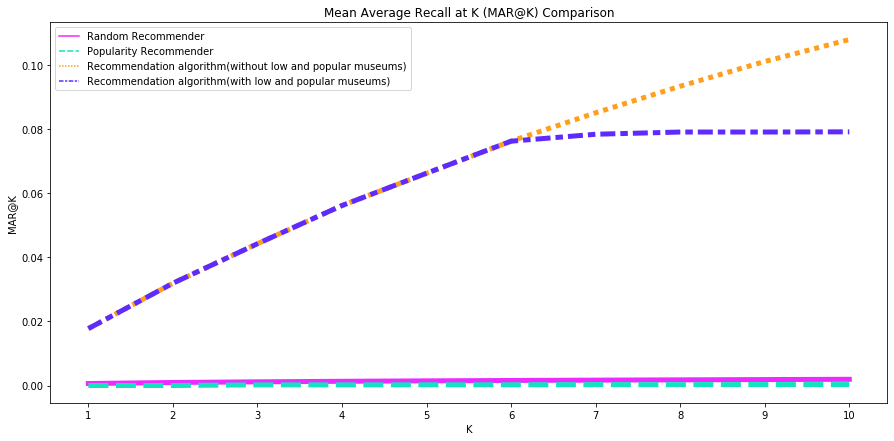

In [99]:
mark_scores = [random_mark, pop_mark, cf_mark, mod_rec_mark]
index = range(1,10+1)
names = ['Random Recommender', 'Popularity Recommender', 'Recommendation algorithm(without low and popular museums)', 'Recommendation algorithm(with low and popular museums)']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

In [100]:
catalog = museum_event_type_df.contentID.unique().tolist()
random_coverage = recmetrics.coverage(random_recos, catalog)
pop_coverage = recmetrics.coverage(popularity_recos, catalog)
cf_coverage = recmetrics.coverage(actual_recos, catalog)
mod_rec_coverage = recmetrics.coverage(mod_actual_recos, catalog)

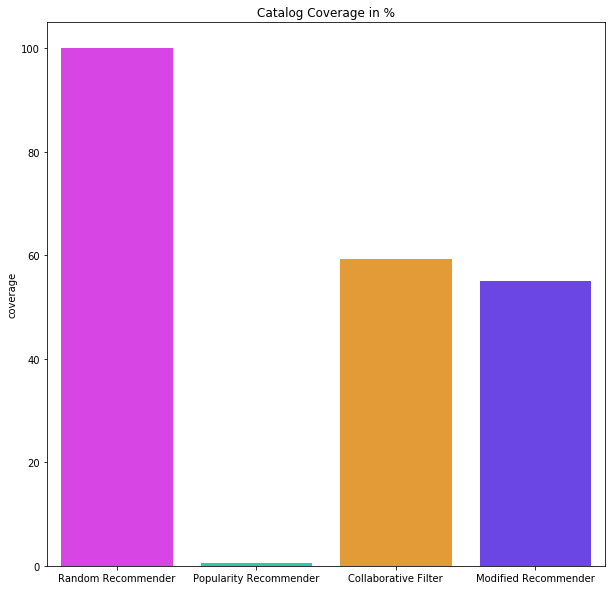

In [101]:
coverage_scores = [random_coverage, pop_coverage, cf_coverage, mod_rec_coverage]
model_names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter', 'Modified Recommender']

fig = plt.figure(figsize=(10, 10))
recmetrics.coverage_plot(coverage_scores, model_names)

In [107]:
#Calculate MAP
cf_map = []
for K in np.arange(1, 11):
    cf_map.extend([ml_metrics.mapk(actual, cf_predictions, k=K)])
cf_map

[0.7545558458523841,
 0.6893451992161985,
 0.644130560998621,
 0.6157593756803832,
 0.5858733398650119,
 0.5641952881196022,
 0.5428672791781636,
 0.5240895865408541,
 0.5069160663454969,
 0.4900133231988637]

In [108]:
mod_rec_map = []
for K in np.arange(1, 11):
    mod_rec_map.extend([ml_metrics.mapk(actual, mod_recommendations, k=K)])
mod_rec_map

[0.7545558458523841,
 0.6893451992161985,
 0.644130560998621,
 0.6157593756803832,
 0.5858733398650119,
 0.5641952881196022,
 0.502873744207023,
 0.44643190044633135,
 0.39684952342937324,
 0.3575159753973438]

In [109]:
random_map = []
for K in np.arange(1, 11):
    random_map.extend([ml_metrics.mapk(actual, random_predictions, k=K)])
random_map

[0.03605486610058785,
 0.02762491835401698,
 0.022785579505043906,
 0.019740637927280643,
 0.017642281733072068,
 0.016064028594237608,
 0.014803905232896554,
 0.013772428345930142,
 0.012944112388647549,
 0.012224652162192984]

In [110]:
pop_map = []
for K in np.arange(1, 11):
    pop_map.extend([ml_metrics.mapk(actual, pop_predictions, k=K)])
pop_map

[0.0,
 0.0,
 0.0044669424486537485,
 0.0035400337470063137,
 0.003093947311125626,
 0.002638616735612163,
 0.002799535228853135,
 0.002449593325246493,
 0.0023076466718966173,
 0.0020768820047069553]

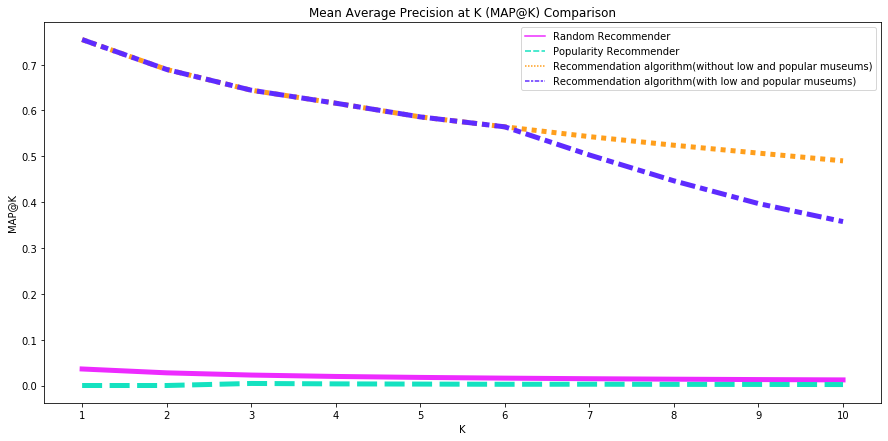

In [111]:
mark_scores_pop = [random_map, pop_map, cf_map, mod_rec_map]
index = range(1,10+1)
names = ['Random Recommender', 'Popularity Recommender', 'Recommendation algorithm(without low and popular museums)', 'Recommendation algorithm(with low and popular museums)']

fig = plt.figure(figsize=(15, 7))
#create palette
recommender_palette = ["#ED2BFF", "#14E2C0", "#FF9F1C", "#5E2BFF","#FC5FA3"]
sns.set_palette(recommender_palette)

#lineplot
mark_df = pd.DataFrame(np.column_stack(mark_scores_pop), index, columns=names)
ax = sns.lineplot(data=mark_df)
plt.xticks(index)
plt.setp(ax.lines,linewidth=5)

#set labels
ax.set_title('Mean Average Precision at K (MAP@K) Comparison')
ax.set_ylabel('MAP@K')
ax.set_xlabel('K')

plt.show()